## Logistic Regression cheat sheet

Gender classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report 

Dataset info:
<ul>
  <li><strong>long_hair:</strong> This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".</li>
  <li><strong>forehead_width_cm:</strong> This column is in CM's. This is the width of the forehead.</li>
  <li><strong>forehead_height_cm:</strong> This is the height of the forehead and it's in Cm's.</li>
  <li><strong>nose_wide:</strong> This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".</li>
  <li><strong>nose_long:</strong> This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".</li>
  <li><strong>lips_thin:</strong> This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".</li>
  <li><strong>distance_nose_to_lip_long:</strong> This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".</li>
  <li><strong>gender:</strong> This is either "Male" or "Female".</li>
</ul>

source: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

reading data from csv file

In [2]:
df = pd.read_csv("datasets\\gender_classification_v7.csv")

### Data exploration

First step after loading the dataset is getting to know the data you're working on, looking at summary statistics, amount of missing values, size and shape of the data and data types

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.shape

(5001, 8)

In [5]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

All features are continuous/numeric and dependent variable is object type, but note that columns: <b>long_hair, nose_wide, nose_long, lips_thin and distance_nose_to_lip_long</b> are actually binary categories

In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

There are no NaN values in the dataset

### Encoding target feature for convinience in analysis and for compatibility with scikit-learn algorithms

In [8]:
df.loc[:1,"gender"]

0      Male
1    Female
Name: gender, dtype: object

In [9]:
LabelEncoder().fit_transform(df["gender"])

array([1, 0, 1, ..., 0, 0, 1])

In [10]:
df.loc[:1,"gender"]

0      Male
1    Female
Name: gender, dtype: object

<b>Male</b> = 1
<b>Female</b> = 0

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) plays a critical role in feature selection for predictive modeling by identifying patterns and trends in the data and determining which features are most informative. Additionally, during EDA, data is validated to ensure that feature distributions are suitable for building a reliable predictive model, enabling us to make fair assumptions based on these features.

#### Target variable

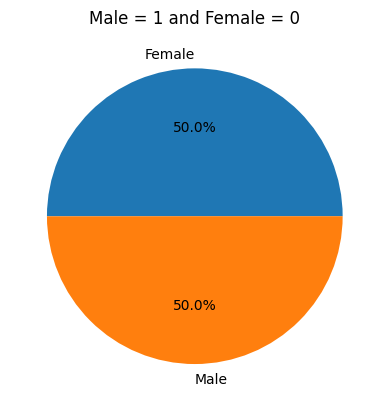

In [11]:
gender_count = df["gender"].value_counts()
plt.pie(gender_count,autopct='%1.1f%%',labels=gender_count.index)
plt.title("Male = 1 and Female = 0")
plt.show()

Distribution of target values is balanced

#### long_hair

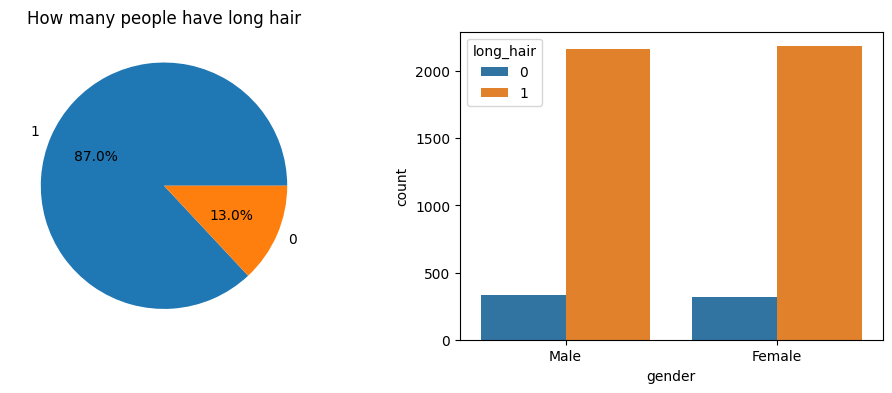

In [12]:
long_hair_count = df["long_hair"].value_counts()

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].pie(long_hair_count,autopct='%1.1f%%',labels=long_hair_count.index)
ax[0].title.set_text("How many people have long hair")

sns.countplot(x=df["gender"],ax=ax[1],hue=df["long_hair"])

plt.show()

Most of people have long hair but the fact that someone has long or short hair does not suggest their gender

#### forehead_width_cm

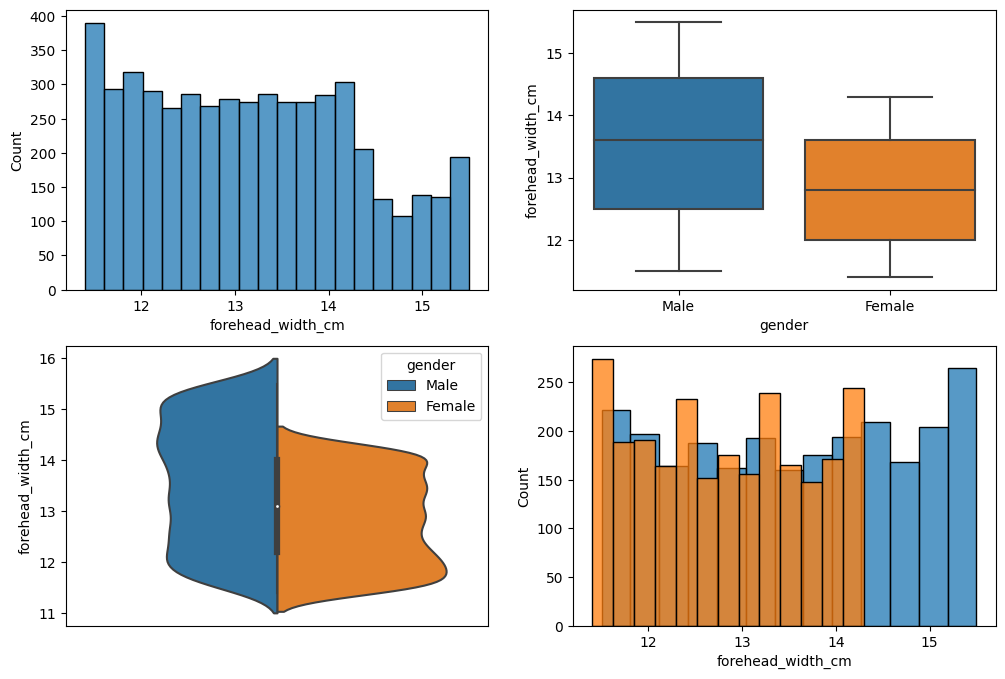

In [13]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

sns.histplot(df["forehead_width_cm"],ax=ax[0,0])

sns.boxplot(data=df,x="gender",y="forehead_width_cm",ax=ax[0,1])

df["dummy"] = 0
sns.violinplot(data=df,x="dummy" ,y="forehead_width_cm", hue="gender",ax=ax[1,0],split=True)
df.drop(columns="dummy",inplace=True)
ax[1,0].set_xticks([])
ax[1,0].set_xlabel('')


sns.histplot(df.loc[df["gender"] == "Male","forehead_width_cm"],ax=ax[1,1])
sns.histplot(df.loc[df["gender"] == "Female","forehead_width_cm"],ax=ax[1,1])

plt.show()

In [14]:
# forehead width statistics for men and women
df.groupby("gender")["forehead_width_cm"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2501.0,12.811675,0.876703,11.4,12.0,12.8,13.6,14.3
Male,2500.0,13.551440,1.187325,11.5,12.5,13.6,14.6,15.5


It is more common for women to have a small forehead and for men to have a large forehead

#### forehead_height_cm

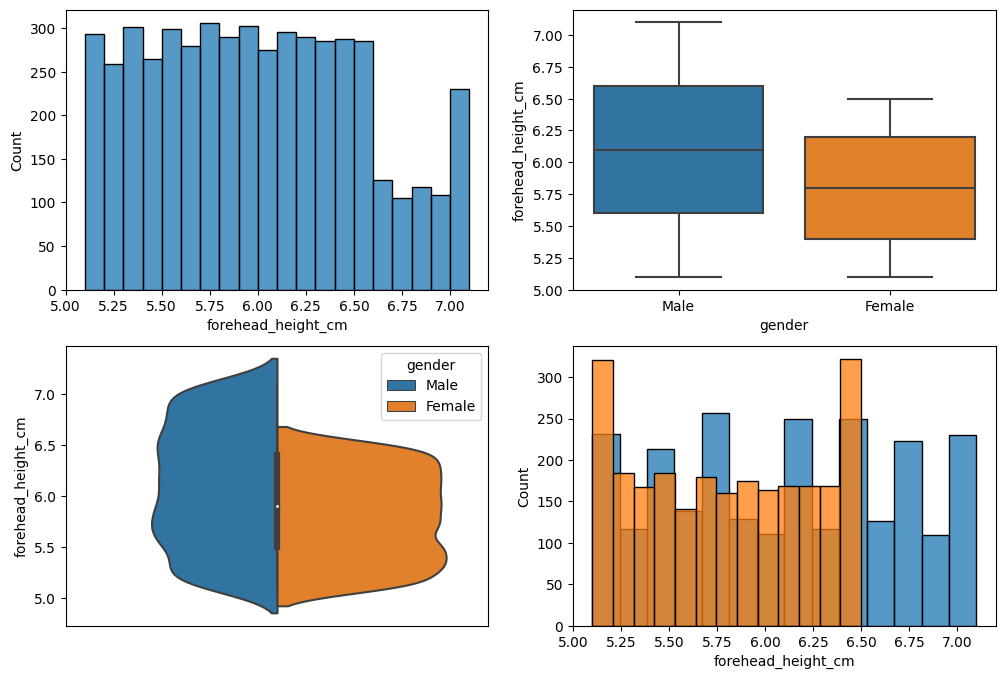

In [15]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

sns.histplot(df["forehead_height_cm"],ax=ax[0,0])

sns.boxplot(data=df,x="gender",y="forehead_height_cm",ax=ax[0,1])

df["dummy"] = 0
sns.violinplot(data=df,x="dummy" ,y="forehead_height_cm", hue="gender",ax=ax[1,0],split=True)
df.drop(columns="dummy",inplace=True)
ax[1,0].set_xticks([])
ax[1,0].set_xlabel('')


sns.histplot(df.loc[df["gender"] == "Male","forehead_height_cm"],ax=ax[1,1])
sns.histplot(df.loc[df["gender"] == "Female","forehead_height_cm"],ax=ax[1,1])

plt.show()

Similar to the observation for forehead width, the height of female foreheads tends to be smaller than that of male foreheads

#### nose_wide and nose_long

I'm performing analysis of these two features together, because they both reffer to nose parameters and both are either 1 for wide/long nose and 0 for not wide/not long nose

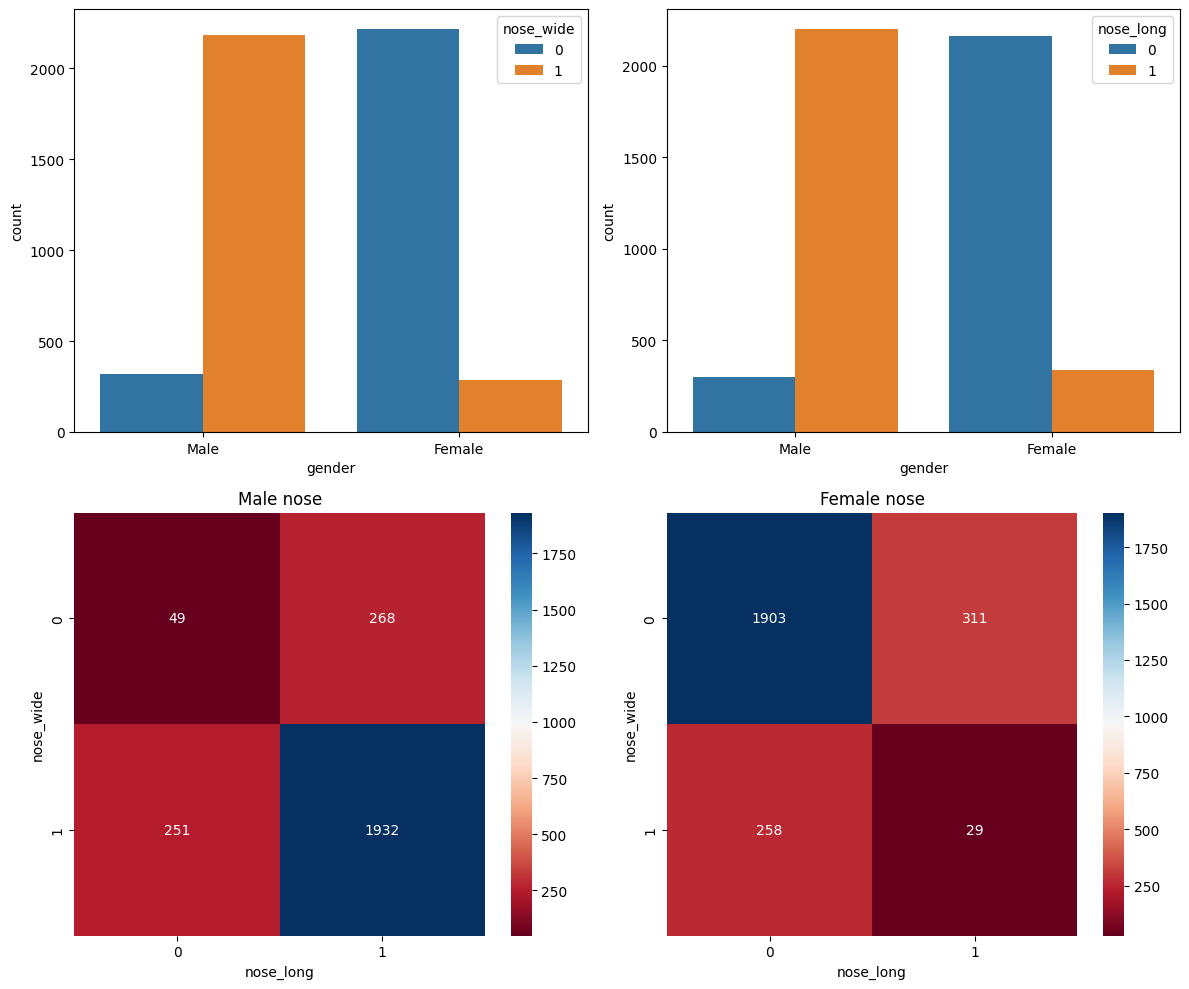

In [16]:
fig,ax = plt.subplots(2,2,figsize=(12,10))

sns.countplot(data=df,x="gender",hue="nose_wide",ax=ax[0,0],hue_order=[0,1])

sns.countplot(data=df,x="gender",hue="nose_long",ax=ax[0,1],hue_order=[0,1])

sns.heatmap(df.loc[df["gender"]=="Male"].pivot_table(index='nose_wide', columns="nose_long", aggfunc='size',
                                                     fill_value=0),ax=ax[1,0],cmap="RdBu",annot=True,fmt="d")
ax[1,0].title.set_text("Male nose")

sns.heatmap(df.loc[df["gender"]=="Female"].pivot_table(index='nose_wide', columns="nose_long", aggfunc='size',
                                                       fill_value=0),ax=ax[1,1],cmap="RdBu",annot=True,fmt="d")
ax[1,1].title.set_text("Female nose")

plt.tight_layout()

Males tend to have long wide noses and females don't

#### lips_thin

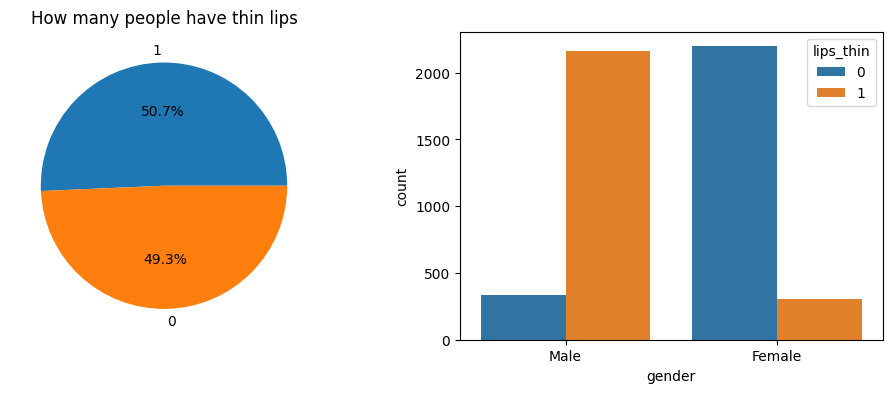

In [17]:
lips_thin_count = df["lips_thin"].value_counts()

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].pie(lips_thin_count,autopct='%1.1f%%',labels=long_hair_count.index)
ax[0].title.set_text("How many people have thin lips")

sns.countplot(x=df["gender"],ax=ax[1],hue=df["lips_thin"])

plt.show()

Usually men have thin lips and women don't

#### distance_nose_to_lip_long

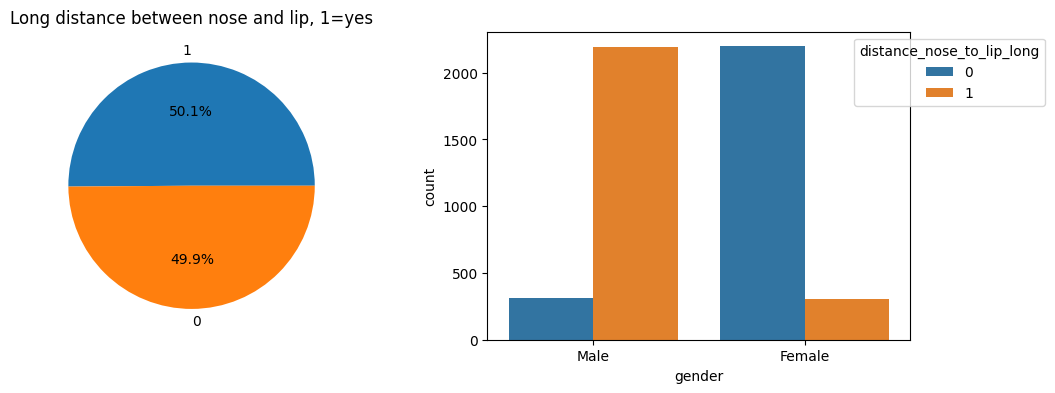

In [18]:
distance_nose_to_lip_long_count = df["distance_nose_to_lip_long"].value_counts()

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].pie(distance_nose_to_lip_long_count,autopct='%1.1f%%',labels=long_hair_count.index)
ax[0].title.set_text("Long distance between nose and lip, 1=yes")

sns.countplot(x=df["gender"],ax=ax[1],hue=df["distance_nose_to_lip_long"])
ax[1].legend(title="distance_nose_to_lip_long",labels=[0,1],bbox_to_anchor=(0.85, 1.0))

plt.show()

Men have greater distance between nose and lip

### Feature selection

Based on exploratory data analysis, best features to predict gender can be chosen. Among all features only long_hair did not show difference between males and females.

Looking for strong correlation between features. Fact of having strongly correlated features might cause unwanded behaviour of the model, like issues with feature coefficients or redundant information.

<AxesSubplot: >

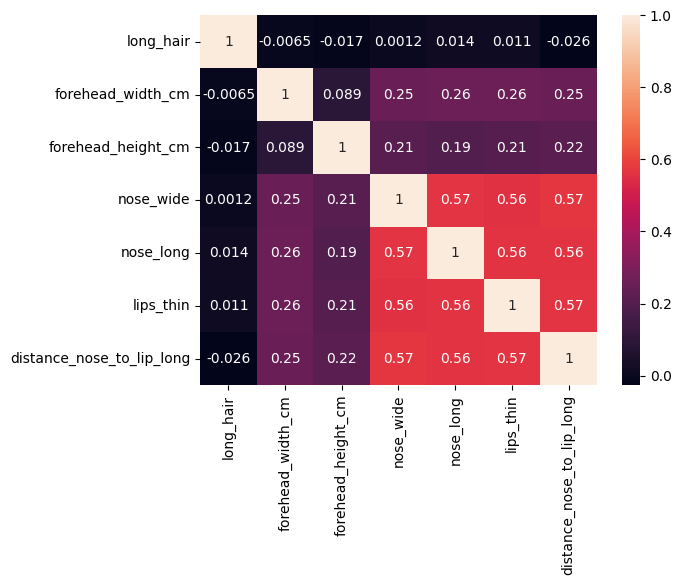

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

It can be seen that some features correlate moderately strongly with each other. In this case, this is not a problem; in fact, it is useful for the classification problem because we know that some features tend to be strictly associated with either men or women. Additionally, there is no feature that is strongly correlated with another feature to the extent that it would be redundant.

In [20]:
df_selected = df.drop(columns="long_hair")
df_selected.head(3)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,Male
1,14.0,5.4,0,0,1,0,Female
2,11.8,6.3,1,1,1,1,Male


### Spliting the dataset into X(features) and y(target)

In [21]:
X = df_selected.iloc[:,:-1]
y = df_selected.iloc[:,-1]

In [22]:
X.head(3)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,11.8,6.1,1,0,1,1
1,14.0,5.4,0,0,1,0
2,11.8,6.3,1,1,1,1


In [23]:
y.head(3)

0      Male
1    Female
2      Male
Name: gender, dtype: object

### Encoding dependent variable

One Hot Encoding for compatibility with scikit-learn

In [24]:
y = LabelEncoder().fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 1])

#### Male = 1, Female = 0

### Logistic regression

In [25]:
# split data into training and testing
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=1)

In [26]:
# creating logistic regression object
lr = LogisticRegression(random_state=1)

In [27]:
# fitting model to training data
lr.fit(train_X,train_y)

LogisticRegression(random_state=1)

In [28]:
# making predictions on trained model
default_lr_prediction = lr.predict(test_X)

Evaluating the model with default hyperparameters

In [29]:
print("Accuracy: ",accuracy_score(test_y,default_lr_prediction))

Accuracy:  0.9656274980015987


In [30]:
print("Precision: ",precision_score(test_y,default_lr_prediction))

Precision:  0.9666666666666667


In [31]:
print("Recall: ",recall_score(test_y,default_lr_prediction))

Recall:  0.96513470681458


In [32]:
print("F1 score: ",f1_score(test_y,default_lr_prediction))

F1 score:  0.9659000793021412


In [33]:
pd.DataFrame(classification_report(test_y,default_lr_prediction,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964573,0.966667,0.965627,0.965620,0.965629
recall,0.966129,0.965135,0.965627,0.965632,0.965627
f1-score,0.965351,0.965900,0.965627,0.965625,0.965628
support,620.000000,631.000000,0.965627,1251.000000,1251.000000


Evaluation by cross-validation

In [34]:
default_lr_cross_val = pd.DataFrame(cross_validate(lr,X,y,scoring=["accuracy","precision","recall","f1"],
                                                   cv=10))
default_lr_cross_val

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.024932,0.004987,0.954092,0.941634,0.968,0.954635
1,0.019946,0.004987,0.974000,0.975904,0.972,0.973948
2,0.025930,0.004987,0.964000,0.960317,0.968,0.964143
3,0.022939,0.003989,0.958000,0.967347,0.948,0.957576
4,0.028922,0.003990,0.974000,0.972112,0.976,0.974052
5,0.024934,0.004986,0.980000,0.976190,0.984,0.980080
6,0.025942,0.004976,0.966000,0.967871,0.964,0.965932
7,0.025930,0.003989,0.964000,0.967742,0.960,0.963855
8,0.031425,0.005983,0.974000,0.979757,0.968,0.973843
9,0.027927,0.004985,0.970000,0.964427,0.976,0.970179


In [35]:
default_lr_cross_val.iloc[:,2:].mean()

test_accuracy     0.967809
test_precision    0.967330
test_recall       0.968400
test_f1           0.967824
dtype: float64

Tuning hyperparameters by hand

In [36]:
lr2 = LogisticRegression(random_state=1,penalty=None)

In [37]:
pd.DataFrame(cross_validate(lr2,X,y,scoring=["accuracy","precision","recall","f1"],
                                                   cv=10)).iloc[:,2:].mean()

test_accuracy     0.968009
test_precision    0.967698
test_recall       0.968400
test_f1           0.968013
dtype: float64

In [38]:
lr3 = LogisticRegression(random_state=1,penalty="l1",solver="liblinear")

In [39]:
pd.DataFrame(cross_validate(lr3,X,y,scoring=["accuracy","precision","recall","f1"],
                                                   cv=10)).iloc[:,2:].mean()

test_accuracy     0.967609
test_precision    0.967320
test_recall       0.968000
test_f1           0.967617
dtype: float64

In [40]:
lr4 = LogisticRegression(random_state=1,C=0.2)

In [41]:
pd.DataFrame(cross_validate(lr4,X,y,scoring=["accuracy","precision","recall","f1"],
                                                   cv=10)).iloc[:,2:].mean()

test_accuracy     0.967610
test_precision    0.967307
test_recall       0.968000
test_f1           0.967618
dtype: float64

Tuning hyperparameters using GridSearchCV

Logsitic regression algorithms compatible with L2 penalty
<ul>
  <li>lbfgs</li>
  <li>liblinear</li>
  <li>newton-cg</li>
  <li>newton-cholesky</li>
  <li>sag</li>
  <li>saga</li>
</ul>

In [42]:
hyperparameters = {"C":np.linspace(1,0.1,10),"solver":["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"],
                  "random_state":[1]}

In [43]:
grid_search = GridSearchCV(LogisticRegression(),param_grid=hyperparameters,scoring="accuracy",n_jobs=-1,cv=10)

In [44]:
grid_search

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
                         'random_state': [1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [45]:
grid_search.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
                         'random_state': [1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [46]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_random_state,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036860,0.009547,0.001913,0.000837,1.0,1,lbfgs,"{'C': 1.0, 'random_state': 1, 'solver': 'lbfgs'}",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1
1,0.010949,0.004376,0.001605,0.000544,1.0,1,liblinear,"{'C': 1.0, 'random_state': 1, 'solver': 'libli...",0.946108,0.962,...,0.952,0.958,0.970,0.962,0.954,0.968,0.962,0.959011,0.006922,43
2,0.040499,0.007617,0.002495,0.003201,1.0,1,newton-cg,"{'C': 1.0, 'random_state': 1, 'solver': 'newto...",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1
3,0.011502,0.002580,0.001601,0.000661,1.0,1,newton-cholesky,"{'C': 1.0, 'random_state': 1, 'solver': 'newto...",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1
4,0.078010,0.009968,0.001746,0.000600,1.0,1,sag,"{'C': 1.0, 'random_state': 1, 'solver': 'sag'}",0.952096,0.962,...,0.960,0.974,0.974,0.960,0.960,0.982,0.970,0.965810,0.008491,40
5,0.089492,0.008684,0.001599,0.000434,1.0,1,saga,"{'C': 1.0, 'random_state': 1, 'solver': 'saga'}",0.942116,0.956,...,0.956,0.958,0.966,0.958,0.954,0.962,0.954,0.956212,0.005868,49
6,0.023599,0.005738,0.001546,0.000470,0.9,1,lbfgs,"{'C': 0.9, 'random_state': 1, 'solver': 'lbfgs'}",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1
7,0.008637,0.003175,0.001864,0.000501,0.9,1,liblinear,"{'C': 0.9, 'random_state': 1, 'solver': 'libli...",0.942116,0.956,...,0.950,0.958,0.970,0.958,0.954,0.966,0.956,0.956612,0.007301,47
8,0.037899,0.006375,0.001753,0.000334,0.9,1,newton-cg,"{'C': 0.9, 'random_state': 1, 'solver': 'newto...",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1
9,0.010406,0.002335,0.002845,0.004073,0.9,1,newton-cholesky,"{'C': 0.9, 'random_state': 1, 'solver': 'newto...",0.954092,0.974,...,0.958,0.974,0.980,0.966,0.964,0.974,0.970,0.967809,0.007649,1


In [47]:
grid_search.best_score_

0.9678091816367266

In [48]:
grid_search.best_params_

{'C': 1.0, 'random_state': 1, 'solver': 'lbfgs'}